#image processing using convolutional neural network

#Dalal Adnan @ Oeson company



#DATA SCIENCE - Oeson Internship Final project
# Image Processing
We have image dataset taken from a popular photo studio  that  contains images from different photographers.

The dataset is raw and contains thousands of photographs from different photographers stored at the same location.


Since the data is huge… categorization of  photos is a hectic task .


As a Data scientist the studio wants to develop a machine learning model  to classify photographs into categories .


Some already categorized images are supplied but  unlabeled so I needed  to do some work :


1- take a big enough sample of already categorized data .. (I chose 298 picture of each category )


        Check to be sure images in each folder  are all in same category (cleaning the sample )
        Choose photos that clearly define each category so we extract the features .
       Check if categories are really clear and enough to classify the data or we can add even more categories
            (some pictures contain more than one aspects together )
        So the categories decided were :
                           -Architecture
                           -Food and Drinks
                           -Art and Culture
                           -Travel and adventures
2- read the sample and convert it into stored Pandas data frame .

3-use it for  training and Testing our Convolution Neural Network Model .

4- check the accuracy of the model and optimizing it .

5-Store the model in H5 file type

6-load the model and Use it for new images classifications.


[1]importing important Libraries

In [ ]:
#importing the libraries
import os
import cv2
import numpy as np
import tensorflow.python.keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd

[2]defining a function to read the image files from same category (in one folder )

..resize each  into 128,128 and define the label for this category .
create pandas dataframe and return it  

In [ ]:
def images_to_ds (path,class_id):
   img_data_func = []
   for img in os.listdir(path):
      pic = cv2.imread(os.path.join(path,img))
      pic = cv2.cvtColor(pic ,cv2.COLOR_BGR2RGB)
      pic = cv2.resize(pic,(128,128))
      img_data_func.append([pic])
   iDS= pd.DataFrame(img_data_func)
   iDS["Target"]= class_id
   return iDS

[3]calling the function to read the sample folders of the four categories
and concatinating all the dataframes .

In [ ]:
iDS_arch =images_to_ds("/content/drive/MyDrive/images/Architecturee",0)
iDS_cult =images_to_ds("/content/drive/MyDrive/images/culture",1)
iDS_food =images_to_ds("/content/drive/MyDrive/images/food",2)
iDS_travel =images_to_ds("/content/drive/MyDrive/images/Travel",3)
iDS= pd.concat([iDS_arch, iDS_cult,iDS_food,iDS_travel], axis=0)


[4] shuffling the records randomly in place by calling .sample ()where fraction is the whole dataframe frac=1.

defining categories array

classids=["Architecture","Culture & Art","Food & Drinks","Travel & Adventure"]

dividing the dataframe into x and y .

dividing data into training and testing data



In [ ]:
iDS = iDS.sample(frac=1).reset_index(drop=True)
iDS.shape
classids=["Architecture","Culture & Art","Food & Drinks","Travel & Adventure"]
xfeature=iDS.iloc[:,0].values
y_label=iDS.iloc[:,1].values
xfeature.shape
X_train,X_test,y_train,y_test=train_test_split(xfeature,y_label,test_size=0.2,random_state=0)
X_train.shape

(953,)

[5] Reshaping our data into the needed shape

 where is 953 is the number of training images  
239 is the testing images

and normalizing RGB values by dividing by 255 so all values become between 0 and 1 to minimize calculations .

In [ ]:
xtr=np.array(X_train.tolist()).reshape(953,128,128,3)/255.0
xts=np.array(X_test.tolist()).reshape(239,128,128,3)/255.0
ytr=y_train.reshape(-1,)
yts=y_test.reshape(-1,)

[6] Defining a function for plotting different pictures with related category

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classids[y[index]])

[7]examples from the traing images

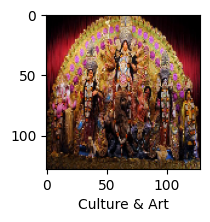

In [ ]:
plot_sample(xtr, ytr, 7)

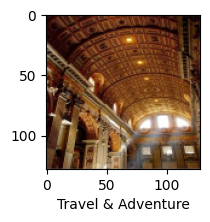

In [ ]:
plot_sample(xtr, ytr, 5)

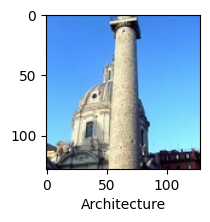

In [ ]:
plot_sample(xtr, ytr, 4)

[10]defining the layers and filters sizes of our cnn model , using pooling .
using relu activation function inside the hidden layers and

softmax in the output layer since its the best in multi classes cases .

input_shape=(128, 128, 3) is because each image has RGB 3 layers

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])


[11] compiling the model trying to optimize it with hyper parameters as seen
optimizer='adam'

loss='sparse_categorical_crossentropy'

metrics=['accuracy']

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

[12]fitting model on training data using 10 double sided rounds (epochs)

we can see the accuracy increasing in each epoch

In [ ]:
cnn.fit(xtr, ytr, epochs=10)

Epoch 1/10
30/30 [==============================] - 32s 943ms/step - loss: 1.5862 - accuracy: 0.3610
Epoch 2/10
30/30 [==============================] - 42s 1s/step - loss: 1.0526 - accuracy: 0.5603
Epoch 3/10
30/30 [==============================] - 26s 874ms/step - loss: 0.8594 - accuracy: 0.6663
Epoch 4/10
30/30 [==============================] - 27s 866ms/step - loss: 0.6986 - accuracy: 0.7240
Epoch 5/10
30/30 [==============================] - 33s 1s/step - loss: 0.5160 - accuracy: 0.8206
Epoch 6/10
30/30 [==============================] - 28s 899ms/step - loss: 0.3823 - accuracy: 0.8751
Epoch 7/10
30/30 [==============================] - 28s 939ms/step - loss: 0.2129 - accuracy: 0.9507
Epoch 8/10
30/30 [==============================] - 27s 917ms/step - loss: 0.1238 - accuracy: 0.9675
Epoch 9/10
30/30 [==============================] - 30s 1s/step - loss: 0.0739 - accuracy: 0.9906
Epoch 10/10
30/30 [==============================] - 27s 919ms/step - loss: 0.0361 - accuracy: 0.996

[13]predictions done on test data

In [ ]:
y_pred = cnn.predict(xts)
y_pred[:5]

8/8 [==============================] - 2s 199ms/step


array([[9.6419416e-03, 1.6201395e-01, 6.1223302e-03, 8.2222170e-01,
        6.5869622e-11, 5.8097038e-11, 1.3805554e-10, 9.1644802e-13,
        3.9407862e-11, 2.3829426e-11],
       [4.0597105e-04, 4.6931771e-03, 1.5657738e-01, 8.3832335e-01,
        3.8445667e-11, 2.0326105e-10, 6.2545907e-10, 1.1590093e-12,
        1.3537781e-10, 2.3607300e-11],
       [6.8506179e-06, 1.0983282e-01, 8.2167721e-01, 6.8483122e-02,
        3.0294471e-13, 7.5316680e-12, 2.9041229e-11, 4.0179563e-15,
        5.5046770e-12, 7.6375283e-13],
       [2.5749573e-01, 7.1014278e-04, 1.3034491e-04, 7.4166375e-01,
        4.6923820e-10, 5.0342175e-11, 1.4662045e-10, 8.4379300e-12,
        4.5102335e-11, 2.0046288e-11],
       [9.1389304e-01, 1.2033364e-02, 1.0637666e-05, 7.4062869e-02,
        4.2411850e-13, 1.5741706e-14, 1.5839840e-13, 2.6759560e-15,
        4.4323022e-14, 4.1681807e-14]], dtype=float32)

[14] getting the classes depending on the model prediction using argmax function
comparing the predicted classes and the original classes

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

y_pred_class=np.array(y_classes)
y_pred_class[:15]

array([3, 3, 2, 3, 0, 3, 3, 2, 2, 3, 1, 0, 1, 3, 3])

In [ ]:
yts[:15]

array([0, 2, 1, 0, 3, 3, 3, 2, 2, 3, 1, 0, 1, 1, 1])

[16] plotting some examples from testing images to see how accurate is the model

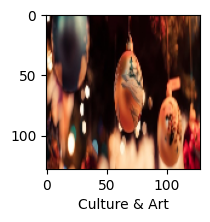

In [ ]:
plot_sample(xts, yts, 2)

In [ ]:
plot_sample(xts, y_pred_class,2)

NameError: ignored

In [ ]:
classids[y_pred_class[2]]

'Food & Drinks'

[19] the cnn model  summary

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

[20] evaluating the model accuracy on test data which is 0.7113

In [ ]:
cnn.evaluate(xts,yts)

8/8 [==============================] - 2s 189ms/step - loss: 1.3479 - accuracy: 0.7071


[1.3478554487228394, 0.7071129679679871]

[21] saving the model to reuse for classifications in the other python file -to be continued

In [ ]:
cnn.save("/content/drive/MyDrive/images/cnn_final_model.h5")